In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from scipy.io import loadmat
from scipy.misc import imread

import os, pickle

from util import *
%load_ext autoreload
%aimport util
%autoreload 1

In [2]:
videos = {}
squat_dir = Data + 'squats/'
for video in os.listdir(squat_dir):
    frames = []
    video_dir = squat_dir + video + '/'
    for frame in sorted(os.listdir(video_dir)):
        path = video_dir + str(frame)
        frames.append(imread(path))
    videos[video] = np.array(frames)

In [4]:
names = sorted(videos.keys())
np.random.seed(0)
np.random.shuffle(names)

In [5]:
N = len(names)
train_indices = int(0.8 * N)
val_indices = int(0.1 * N)
test_indices = int(0.1 * N)
dataset_names = {
    'train' : names[: train_indices],
    'val' : names[train_indices : train_indices + val_indices],
    'test' : names[train_indices + val_indices :]
}

In [7]:
labels_L_1 = {}
squat_label_dir = Data + 'squat_labels/'
for video in os.listdir(squat_label_dir):
    frames = []
    video_dir = squat_label_dir + video + '/'
    for frame in sorted(os.listdir(video_dir)):
        file = video_dir + frame
        frames.append(imread(file).reshape((224, 224, 1)))
    labels_L_1[video] = np.array(frames)

In [9]:
output_dir = Data + 'squats_L_1/'
for set_name, video_names in dataset_names.items():
    set_dir = output_dir + set_name + '/'
    make_dir(set_dir)
    for name in video_names:
        video_dir = set_dir + name
        make_dir(video_dir)
        np.save(video_dir + '/video', videos[name])
        np.save(video_dir + '/poses_L_1', labels_L_1[name])

In [10]:
v = np.load(Data + 'squats_L_1/train/1832/video.npy')
p = np.load(Data + 'squats_L_1/train/1832/poses_L_1.npy')

In [12]:
from PIL import Image
np.array(Image.fromarray(v[0]).convert('L'))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

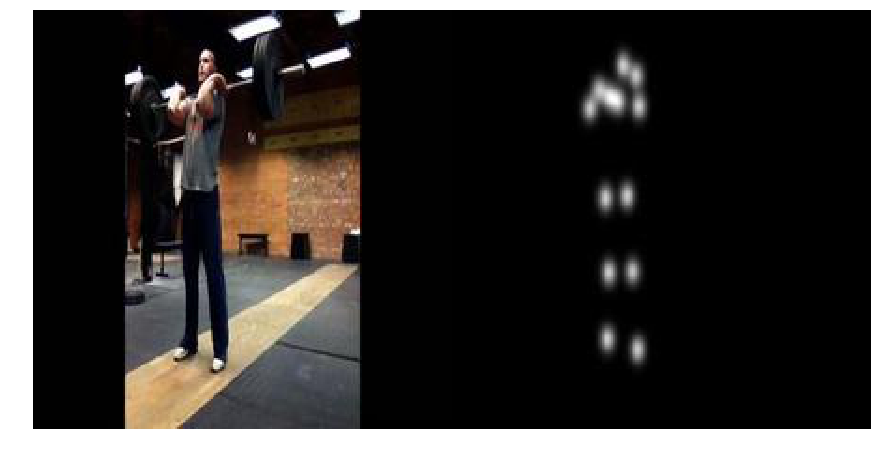

In [13]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(v[0], cmap = 'gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(p[0].reshape((224, 224)), cmap = 'gray')
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [30]:
labels_L_13 = {}
squat_label_multiple_dir = Data + 'squats_labels_multiple/'
for video in os.listdir(squat_label_multiple_dir):
    frames = []
    video_dir = squat_label_multiple_dir + video + '/'
    for frame in sorted(os.listdir(video_dir)):
        frame_dir = video_dir + frame + '/'
        pose_stack = []
        for file in sorted(os.listdir(frame_dir), key=lambda x: int(x[:-4])):
            pose_stack.append(imread(frame_dir + file).reshape((224, 224, 1)))
        frames.append(np.concatenate(pose_stack, axis=2))
    labels_L_13[video] = np.array(frames)